<a href="https://colab.research.google.com/github/camilasp/Taxa_de_mortalidade_hospitalar/blob/main/Projeto_1_taxa_mortalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise da taxa de mortalidade por internação em leito SUS de 2010 a 2021**

##**1.Introdução**

Esse projeto foi desenvolvido após o Estudo do módulo 1 do curso de Data Science aplicada da Alura. Foi solicitado que escolhessemos uma base de dados referente à saude a ser extraída do site do DATASUS Tabnet e que realizassemos uma análise destes dados.
Eu optei por explorar os dados relacionados às taxas de mortalidade por internações em leitos SUS por Unidade Federativa por local de ocorrência. Os dados (taxas) correspondem aos anos entre 2009 e 2021, mas utilizei apenas os dados de 2011 a 2021, ou seja, dos últimos 10 anos.

###**1.1 Sobre os dados**

Os dados utilizados neste projeto são oriundos do Sistema de Informações Hospitalares do SUS - SIH/SUS, sendo processado pelo DATASUS, tendo sido extráidos do portal TABNET(http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def).

As unidades hospitalares participantes do SUS (públicas ou particulares conveniadas) enviam as informações das internações efetuadas através da AIH - Autorização de Internação Hospitalar, para os gestores municipais (se em gestão plena) ou estaduais (para os demais). Estas informações são consolidadas no DATASUS, formando uma valiosa Base de Dados, contendo dados de grande parte das internações hospitalares realizadas no Brasil. 

Os dados escolhidos são relativos às taxas de mortalidade por Unidade da Federação, por ano e mês de processamento, que são calculadas da seguinte forma, segundo informação do DATASUS:

**Taxa de mortalidade:** Razão entre a quantidade de óbitos e o número de AIH aprovadas, computadas como internações, no período, multiplicada por 100.

##**2. Objetivos**


Os seguintes objetivos foram definidos antes do ínicio da análise dos dados:



*   Verificar a tendência da taxa de mortalidade entre os anos de 2011 e 2021; 
*   Analisar as diferenças na taxa entre os Estados da Federação;
*   Verificar a existência de picos na taxa de mortalidade; 
*   Verificar como a pandemia de COVID afetou essa taxa e as variações entre as UF;
*   Formular hipóteses acerca dos resultados encontrados.




##**3. Execução**

###**3.1 Importando as bibliotecas necessárias**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
import seaborn as sns

###**3.2 Preparação dos dados**

In [49]:
dados = pd.read_csv("https://raw.githubusercontent.com/camilasp/Taxa_de_mortalidade_hospitalar/main/dados_projeto_1/mortalidade_data_processamento.csv", 
                    encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=11, engine='python', thousands=".", decimal=",")

In [50]:
dados


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43,5.39,5.15,8.69,2.67
1,12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,2.92
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37,9.16,9.36,11.33,2.89
3,14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76,2.68
4,15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89,3.18,3.60,4.61,2.15
5,16 Amapá,2.72,3.06,1.86,2.26,2.19,1.61,1.90,1.85,1.87,2.37,2.07,2.95,2.28,1.99,1.46,2.49,2.05,2.54,2.11,2.37,2.53,2.22,1.97,2.52,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,...,2.04,2.92,2.65,3.53,4.19,2.97,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.83,4.11,6.10,2.72
6,17 Tocantins,2.12,2.75,2.67,2.39,2.01,2.65,2.63,2.43,2.19,2.04,2.38,2.60,2.13,2.94,1.96,2.05,2.37,2.31,2.65,2.62,2.55,2.90,2.43,2.10,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,...,3.65,3.13,3.60,3.25,2.85,2.48,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.67,5.39,5.28,5.58,4.83,1.98,3.13,4.05,0.99,6.15,2.86
7,21 Maranhão,0.94,1.25,1.17,1.18,1.34,1.07,1.23,1.41,1.27,1.07,0.81,1.24,1.17,1.31,1.24,1.21,1.35,1.19,1.08,1.38,1.35,1.12,1.21,1.44,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,...,2.41,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.21,6.72,4.82,3.60,3.31,3.28,3

In [51]:
dados = dados.drop(27) #vou excluir o total pois não vou utilizar e pode atrapalhar na hora dos calculos e de plotar os gráficos

In [52]:
mapa = {'Unidade da Federação': 'UF'} #vou renomear essa coluna pra algo mais simples pra facilitar na hora de trabalhar com ela
dados.rename(columns=mapa, inplace=True)

Optei por analisar apenas os dados da última década, então vou excluir as colunas anteriores a 2011. Vou fazer um slice da minha base de dados para excluí-las. Antes disso, vou setar minha coluna "Unidade da Federação" como índice, pois faz mais sentido do que uma coluna de números sem relação com meus dados.


In [53]:
dados = dados.set_index("UF")

In [54]:
colunas = dados.columns[36:159] #escolhendo as colunas com que quero trabalhar (exclui todo o ano de 2009 e a coluna total)

In [55]:
dados = dados[colunas]
dados.head()

,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,2.15,1.79,1.97,2.23,2.14,2.26,2.09,2.98,2.90,1.93,1.87,2.12,1.69,2.81,2.63,2.16,2.53,2.77,2.73,2.44,2.45,2.34,2.37,2.49,2.70,2.59,2.58,2.79,3.04,2.64,2.30,2.49,2.58,2.42,2.21,1.86,2.54,2.73,2.58,2.90,...,2.40,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.21,5.34,5.62,4.58,3.59,2.94,4.43,5.39,5.15,8.69
12 Acre,3.16,2.95,2.31,3.29,3.29,2.47,3.52,3.15,3.41,2.65,2.52,2.76,2.74,1.36,2.61,3.05,2.39,2.41,2.74,2.39,1.80,2.57,2.74,2.21,2.33,3.24,2.41,2.80,2.41,1.91,3.20,2.48,2.53,2.28,2.18,2.02,1.92,1.61,1.53,1.99,...,3.06,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17
13 Amazonas,2.20,2.66,2.40,2.55,2.26,2.49,2.54,1.96,2.48,2.47,2.61,2.01,2.65,2.56,2.37,2.59,2.20,2.49,2.52,2.31,2.21,2.39,2.26,2.49,2.39,2.53,2.43,2.63,2.36,2.37,1.43,2.38,2.02,2.24,2.21,2.06,2.35,2.13,2.08,1.89,...,2.81,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.37,9.78,6.08,4.61,4.40,3.95,4.74,4.37,9.16,9.36,11.33
14 Roraima,2.52,1.62,2.05,2.08,1.84,2.38,2.43,2.06,1.85,2.10,2.23,2.08,2.71,2.77,2.37,2.45,2.55,2.49,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,1.75,1.44,1.97,1.50,2.25,1.98,1.43,1.75,1.09,1.88,1.66,1.84,1.73,...,2.48,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.76
15 Pará,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,1.83,1.85,1.90,1.80,1.82,1.98,1.75,1.74,1.91,1.89,2.13,2.00,2.00,2.22,2.17,2.08,2.00,1.93,1.95,2.11,1.97,2.02,2.10,1.94,2.11,1.87,2.05,2.02,2.15,1.98,...,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89,3.18,3.60,4.61


In [56]:
dados_t = dados.T #salvei na variavel dados_t minha base de dados transposta para facilitar a utilização 

###**3.3 Análise Exploratória**

O banco de dados que estou utilizando é composto por linhas com os nomes das Unidades da Federação e colunas que representam os meses e anos de jan/2011 a março/2021 e contém as taxas de mortalidade pelo total de internações na UF naquele ano/mês.

**Verificando a nomeclatura das linhas:**





In [57]:
dados.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='UF')

**Vamos ver como a taxa de mortalidade varia entre Estados. Vou começar investigando a variação das mínimas, máximas e médias por estado:**

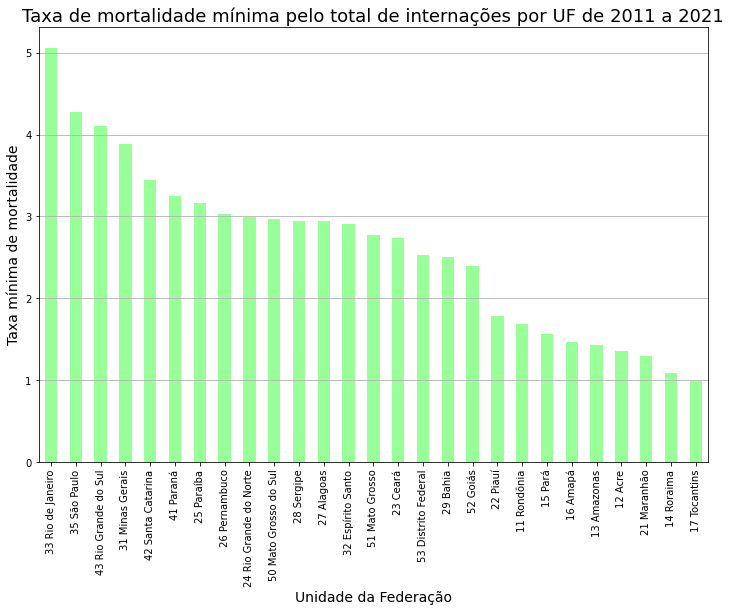

In [58]:

ax= dados_t.min().sort_values(ascending= False).plot(figsize=(12,8), kind="bar", color='#99ff99')
ax.set_xlabel('Unidade da Federação', fontsize=14)
ax.set_ylabel("Taxa mínima de mortalidade", fontsize=14)
plt.title("Taxa de mortalidade mínima pelo total de internações por UF de 2011 a 2021", fontsize=18)
plt.grid(axis = 'y')
plt.show()

**Vemos que a taxa mínima varia de 1% (Tocantins) a 5% (Rio de Janeiro), ou seja, o estado com a maior mínima tem uma taxa de mortalidade mínima 5 vezes maior que a do estado com a mínima mais baixa**

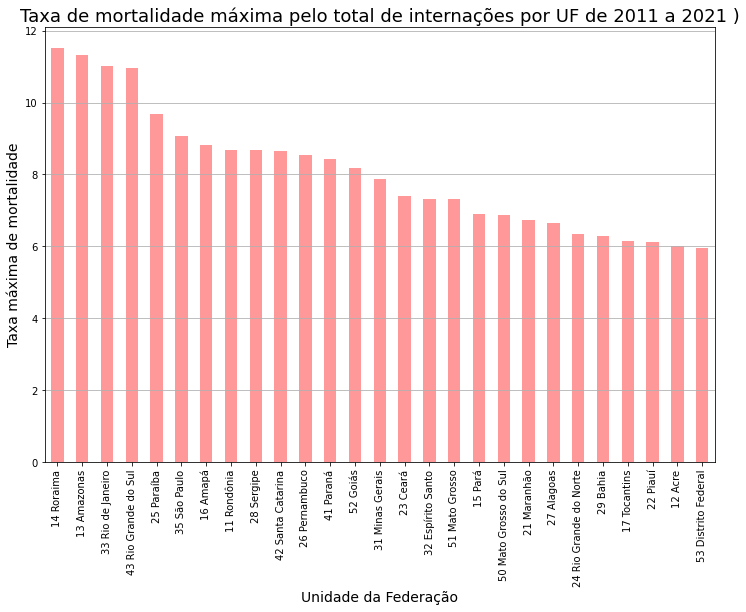

In [59]:
ax = dados_t.max().sort_values(ascending= False).plot(figsize=(12,8), kind="bar", color='#ff9999')
ax.set_xlabel('Unidade da Federação', fontsize=14)
ax.set_ylabel("Taxa máxima de mortalidade", fontsize=14)
plt.title("Taxa de mortalidade máxima pelo total de internações por UF de 2011 a 2021 )", fontsize=18)
plt.grid(axis = 'y')
plt.show()

**No caso das máximas, as taxas variam de 6%(DF) a cerca de 11,7% (Roraima).No caso das máximas a variação entre os Estados é menor, sendo a taxa máxima maior quase o dobro da taxa menor.**

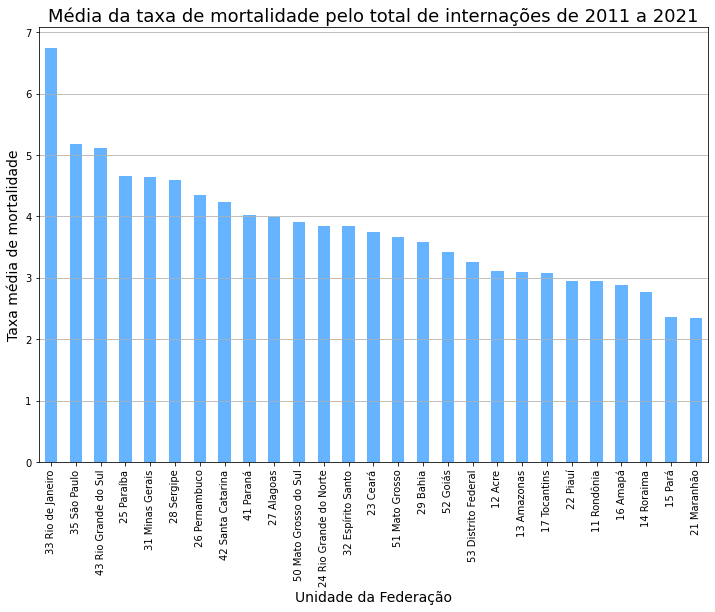

In [60]:
ax = dados_t.mean().sort_values(ascending= False).plot(figsize=(12,8), kind="bar", color='#66b3ff')
ax.set_xlabel('Unidade da Federação', fontsize=14)
ax.set_ylabel("Taxa média de mortalidade", fontsize=14)
plt.title("Média da taxa de mortalidade pelo total de internações de 2011 a 2021", fontsize=18)
plt.grid(axis = 'y')
plt.show()

**As taxas médias de mortalidade por internações variam de aproximadamente 2,3% (Maranhão) a aproximadamente 6,7%(Rio de Janeiro). Dessa forma, a maior taxa média é 3 vezes maior do que a taxa média mais baixa.**

**Dessa forma, verificamos que a taxa máxima foi a que apresentou uma menor variação entre os Estados.**

**Agora vamos analisar como essas taxas estão distribuídas:**

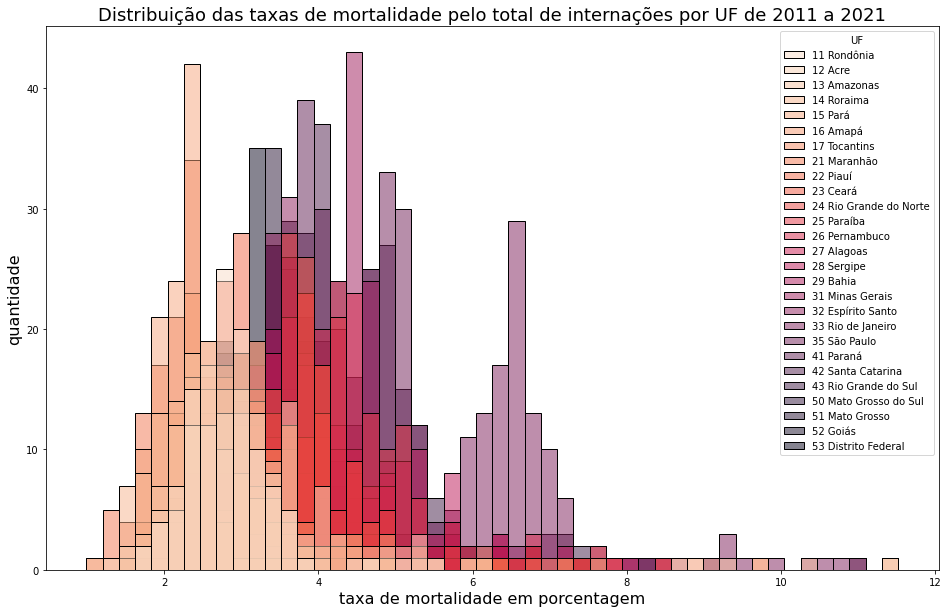

In [61]:
plt.figure(figsize=(16,10))
ax = sns.histplot(data=dados_t, bins=50, palette='rocket_r')
ax.set_title('Distribuição das taxas de mortalidade pelo total de internações por UF de 2011 a 2021', fontsize=18)
ax.set_ylabel('quantidade', fontsize=16)
ax.set_xlabel('taxa de mortalidade em porcentagem', fontsize=16)
plt.show()


**Conseguimos perceber que as taxas de mortalidade  por internação nos Estados ao longo da década se distribuem de forma desigual, sendo que a maior parte das taxas está entre 2% e 5% aproximadamente. Há poucas taxas acima de 7% o que deve indicar um pico de mortalidade em algum momento do período analisado - de 2011 a 2021. Também percebemos por este gráfico que As regiões Norte e Nordeste tem taxas mais baixas de mortalidade hospitalar em geral e o Sudeste tem taxas mais altas.**

**Agora, quero saber um pouco sobre como essas taxas estão variando ao longo do tempo. Vou pedir a média desses valores e ordená-los de forma decrescente:**

In [62]:
dados.mean().sort_values(ascending=False)

2021/Mar    7.343704
2020/Jun    6.520370
2020/Jul    6.433333
2020/Ago    6.044074
2020/Mai    5.881852
              ...   
2011/Jun    3.090370
2011/Mai    3.086667
2011/Abr    3.085926
2012/Mar    3.084074
2011/Mar    3.068148
Length: 123, dtype: float64

**Consegui perceber que as maiores médias são de meses em 2020 e 2021 e que as menores são de 2011 e 2012. Vou verificar a menor e a maior taxa entre todas, para ver de quanto é a variação:**

In [63]:
dados.min().sort_values(ascending=False)

2021/Mar    4.61
2020/Jul    4.57
2020/Jun    4.18
2020/Mai    3.23
2021/Jan    3.18
            ... 
2011/Fev    1.33
2011/Jul    1.32
2011/Jun    1.30
2013/Dez    1.09
2021/Fev    0.99
Length: 123, dtype: float64

In [64]:
dados.max().sort_values(ascending=False)

2020/Jun    11.52
2021/Mar    11.33
2020/Mai    11.01
2020/Jul    10.58
2021/Jan     9.92
            ...  
2011/Fev     5.52
2012/Abr     5.36
2011/Mai     5.35
2012/Mar     5.16
2011/Abr     5.06
Length: 123, dtype: float64

**Foi possível verificar que tem uma variação de aproximadamente 10 pontos percentuais entre a minha mínima (0.99) e a máxima(11.52). Curiosamente, entre as taxas máximas todas se encontram nos anos de 2020 e 2021, porém, entre as taxas mínimas tenho uma taxa de 2021, a menor de todas. O restante das menores taxas ( mínimas mais baixas e máximas mais baixas) são referentes aos anos de 2011 2012 e 2013.**

**Vamos então ver como a taxa média de mortalidade está se comportando ao longo do tempo(2011-2021):**

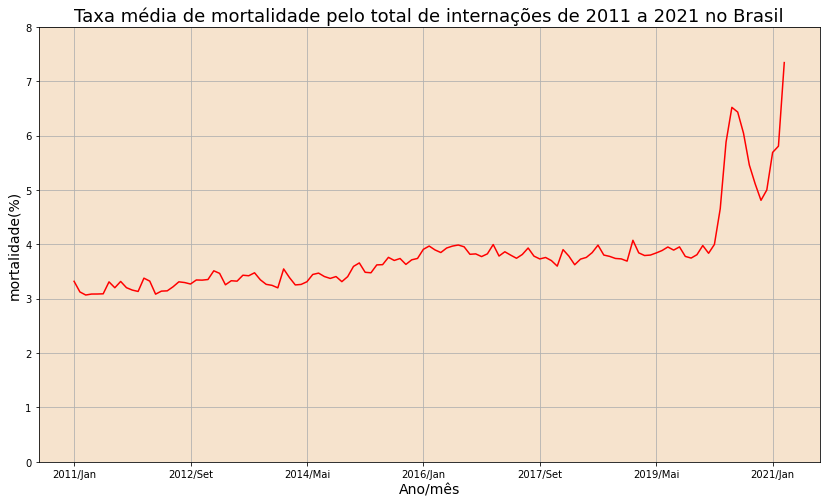

In [65]:
ax = dados.mean().plot(figsize=(14,8), color="red")
ax.set_xlabel('Ano/mês', fontsize=14)
ax.set_ylabel("mortalidade(%)", fontsize=14)
plt.title("Taxa média de mortalidade pelo total de internações de 2011 a 2021 no Brasil", fontsize=18)
ax.set_facecolor("#F6E3CD")
plt.grid()
plt.ylim(0,8)
plt.show()

**Pelo gráfico podemos verificar que a taxa seguiu um padrão de discreto crescimento entre 2011 e o final de 2015, indo de 3% a 4% neste período quando então se manteve estável em aproximadamente 4% até o início de 2020,aproximadamente, quando houve um súbito aumento exponencial dessa taxa, chegando a um pico de 6.5% aproximadamente na metade de 2020 e mantendo a tendência de alta, em picos, até o mês mais recente (março/2021). Esse súbito aumento deve ter sido causado pela pandemia de coronavírus, que chegou  no Brasil no início de 2020.**

**Vou escolher os estados com as maiores e menores taxas e comparar o comportamento dessas taxas ao longo da década:**

In [112]:
dados_t.mean().sort_values()

UF
21 Maranhão               2.132500
15 Pará                   2.192037
14 Roraima                2.442037
16 Amapá                  2.655000
13 Amazonas               2.669352
11 Rondônia               2.735833
22 Piauí                  2.783426
12 Acre                   2.916759
17 Tocantins              2.940556
53 Distrito Federal       3.158519
52 Goiás                  3.162222
29 Bahia                  3.384722
51 Mato Grosso            3.516019
23 Ceará                  3.536111
32 Espírito Santo         3.604444
24 Rio Grande do Norte    3.693611
50 Mato Grosso do Sul     3.707963
41 Paraná                 3.824074
27 Alagoas                3.837222
42 Santa Catarina         4.045370
26 Pernambuco             4.123426
28 Sergipe                4.335185
25 Paraíba                4.360370
31 Minas Gerais           4.471852
43 Rio Grande do Sul      4.900278
35 São Paulo              4.936574
33 Rio de Janeiro         6.416019
dtype: float64

In [67]:
ordenados =dados_t.mean().sort_values(ascending= False).index
maiores = ordenados[0:2]
maiores

Index(['33 Rio de Janeiro', '35 São Paulo'], dtype='object', name='UF')

In [68]:
menores= ordenados[25:]
menores

Index(['15 Pará', '21 Maranhão'], dtype='object', name='UF')

**Os estados que têm as maiores médias de mortalidade pelo total de internações são Rio de Janeiro e São Paulo. Enquanto isso, Pará e Maranhão tiveram as menores taxas médias.**

In [69]:
comparativo = dados.query('UF in @menores | UF in @maiores')

In [70]:
comparativo

,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
UF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15 Pará,1.86,1.80,1.85,1.67,1.73,1.67,1.56,1.72,2.01,1.92,1.83,1.85,1.90,1.80,1.82,1.98,1.75,1.74,1.91,1.89,2.13,2.00,2.00,2.22,2.17,2.08,2.00,1.93,1.95,2.11,1.97,2.02,2.10,1.94,2.11,1.87,2.05,2.02,2.15,1.98,...,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.32,2.75,2.82,2.89,3.18,3.60,4.61
21 Maranhão,1.39,1.33,1.66,1.48,1.56,1.30,1.32,1.63,1.69,1.41,1.70,1.55,1.71,1.86,1.54,1.94,1.83,1.82,1.96,1.78,1.73,1.73,1.78,1.90,2.09,1.85,1.69,1.86,2.41,1.99,2.08,1.99,2.15,2.02,1.79,2.16,2.36,1.96,2.20,2.11,...,2.02,2.41,2.39,2.23,2.41,2.42,2.43,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.21,6.72,4.82,3.60,3.31,3.28,3.24,2.80,3.39,3.90,6.28
33 Rio de Janeiro,6.15,5.52,5.84,5.06,5.35,5.73,5.94,5.58,5.93,5.72,5.84,5.75,6.00,6.07,5.16,5.36,5.71,6.22,5.96,6.06,6.33,6.13,6.05,5.99,6.65,6.03,6.06,6.04,6.03,6.33,6.50,6.18,6.34,6.15,6.41,6.22,6.42,6.10,6.31,6.31,...,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.58,9.32,9.19,8.15,9.29,9.59,9.92,9.35,10.42
35 São Paulo,5.04,4.68,4.51,4.39,4.38,4.73,5.12,4.73,4.76,4.69,4.78,4.72,4.75,4.70,4.38,4.28,4.59,4.89,5.13,4.94,4.79,4.77,4.86,4.91,5.06,4.90,4.62,4.48,4.85,4.90,5.04,5.16,4.98,4.79,4.67,4.78,5.18,5.23,4.76,4.52,...,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.52,6.94,6.71,6.06,6.40,7.09,7.08,9.08


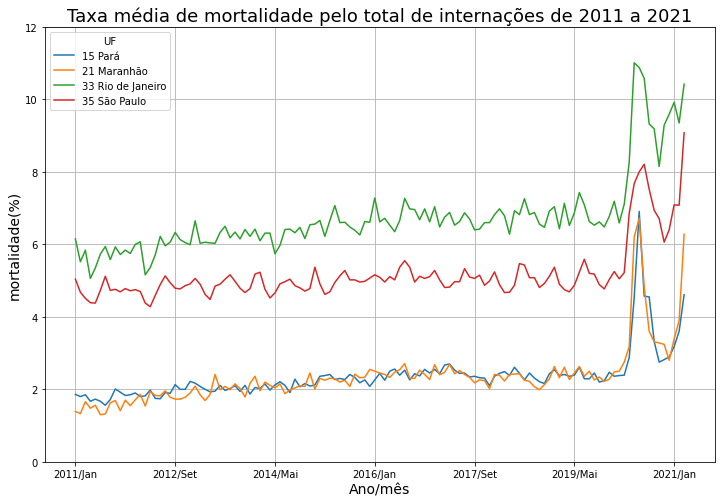

In [71]:
ax = comparativo.T.plot(figsize=(12,8))
ax.set_xlabel('Ano/mês', fontsize=14)
ax.set_ylabel("mortalidade(%)", fontsize=14)
plt.title("Taxa média de mortalidade pelo total de internações de 2011 a 2021", fontsize=18)
plt.ylim(0,12)
plt.grid()
plt.show()


**Percebemos que o comportamento, tanto para os estados com as maiores taxas médias quanto para os com as menores, que a taxa se manteve estável até 2020 quando houve um aumento abrupto da taxa para os quatro estados.Esse aumento parece realmente estar ligado à pandemia de Covid 19 visto que atingiu os Estados de maneira muito similar. Vou analisar melhor o comportamento da taxa no último ano:**

In [72]:
comp_2020 = comparativo.T[110:]

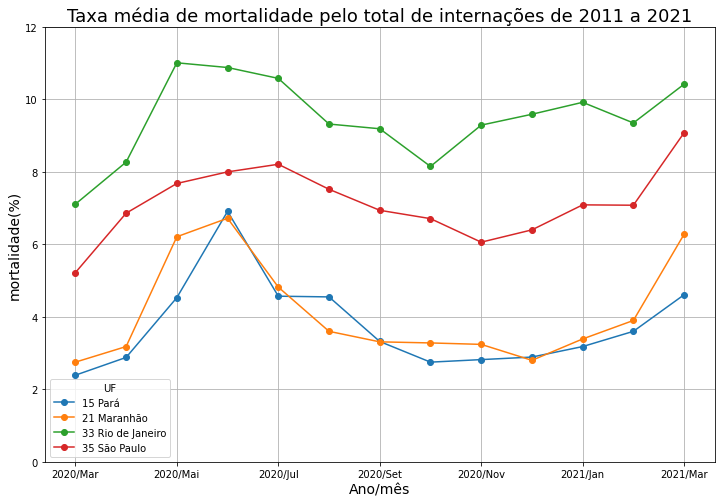

In [73]:
ax = comp_2020.plot(figsize=(12,8), marker='o')
ax.set_xlabel('Ano/mês', fontsize=14)
ax.set_ylabel("mortalidade(%)", fontsize=14)
plt.title("Taxa média de mortalidade pelo total de internações de 2011 a 2021", fontsize=18)
plt.ylim(0,12)
plt.grid()
plt.show()

**A taxa teve um comportamento similar para os quatro estados, com um pico em junho/2020 com posterior retorno as taxas habituais e então uma nova tendência de pico se iniciou por volta de nov/2020 com pequenas quedas mas manutenção da tendência de alta. Esse comportamento é compatível com a pandemia da covid 19 no Brasil.**

##**4 Resultados e Discussão**

**Conseguimos obter diversas informações sobre as taxas de mortalidade pelo total de internações no SUS por Unidade Federativa no período analisado, entre 2011 e 2021:**







* As taxas variam entre 0.99% (mínima) e 11.52% (máxima) no período estudado;






*  A maior parte das taxas está concentrada entre 2% e 5%, sendo que a média por período (ano/mês) vai de 3.06% a 7.34%; 



* A taxa também varia bastante por UF, com médias que vão de 2.36% (Pará) a 6.74%(Rio de Janeiro);


* A taxa média apresentou uma tendência de crescimento baixa, variando cerca de 1% de 2011 até o início de 2020, quando houve um súbito crescimento, provavelmente devido à pandemia de Covid 19;



* Durante o último ano, os Estados com as menores e maiores taxas médias mantiveram um comportamento similar de variação da taxa, o que fortalece a hipótese de que essa alteração tem sido causada pela pandemia.






In [75]:
#Agrupando minhas datas por ano

ano= dados_t.index.to_list()
for periodo in ano:
  if periodo[:4]== "2011":
    dados_t.loc[periodo,"Ano"]  ="2011"
  elif periodo[:4] == "2012":
    dados_t.loc[periodo,"Ano"] = "2012"
  elif periodo[:4] == "2013":
    dados_t.loc[periodo,"Ano"] = "2013"
  elif periodo[:4] == "2014":
    dados_t.loc[periodo,"Ano"] = "2014"
  elif periodo[:4] == "2015":
    dados_t.loc[periodo,"Ano"] = "2015"
  elif periodo[:4] == "2016":
    dados_t.loc[periodo,"Ano"] = "2016"
  elif periodo[:4] == "2017":
    dados_t.loc[periodo,"Ano"] = "2017"
  elif periodo[:4] == "2018":
    dados_t.loc[periodo,"Ano"] = "2018"
  elif periodo[:4] == "2019":
    dados_t.loc[periodo,"Ano"] = "2019"
  elif periodo[:4] == "2020":
    dados_t.loc[periodo,"Ano"] = "2020"
  else:
     dados_t.loc[periodo,"Ano"] = "2021"


   
  

In [76]:
dados_ano= dados_t.set_index("Ano")


**O gráfico a seguir mostra a distribuição das taxas por ano:**

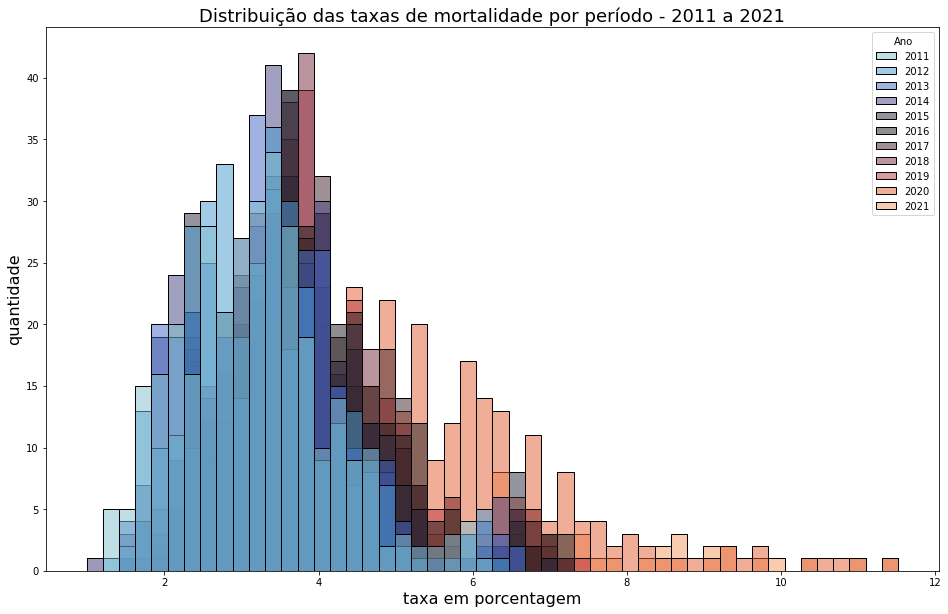

In [77]:
plt.figure(figsize=(16,10))
ax = sns.histplot(data=dados_ano.T, bins=50, palette='icefire')
ax.set_title('Distribuição das taxas de mortalidade por período - 2011 a 2021', fontsize=18)
ax.set_ylabel('quantidade', fontsize=16)
ax.set_xlabel('taxa em porcentagem', fontsize=16)
plt.show()

**É possível perceber que as maiores taxas são referentes aos anos 2020 e 2021. Antes desse período não há taxa superior a 7% e as taxas estão concentradas entre 2% e 5%.**

**Abaixo, o gráfico que mostra o comportamento da taxa de mortalidade média nos 5 Estados com as médias mais altas. Vemos que dos 4 dos 5 estão localizados nas regiões mais desenvolvidas do país e que a taxa no Rio de Janeiro se manteve superior por todo o período estudado:**


In [78]:
maiores = ordenados[0:5]
comparativo = dados.query('UF in @maiores')

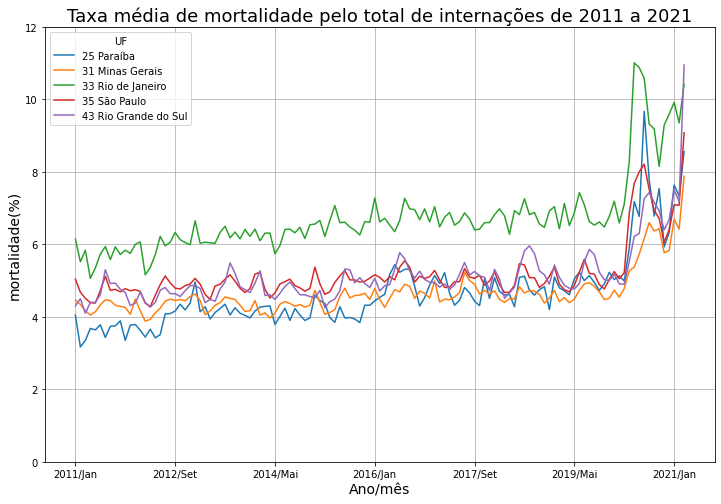

In [79]:

ax = comparativo.T.plot(figsize=(12,8))
ax.set_xlabel('Ano/mês', fontsize=14)
ax.set_ylabel("mortalidade(%)", fontsize=14)
plt.title("Taxa média de mortalidade pelo total de internações de 2011 a 2021", fontsize=18)
plt.ylim(0,12)
plt.grid()
plt.show()

**Não há informações que justifiquem a diferença de taxas entre os Estados ou por que as taxas no Rio de Janeiro são tão altas e por que as taxas tanto em São Paulo quanto no Rio de Janeiro são tão superiores às médias de Maranhão e Pará, quando na verdade, por serem Estados mais ricos e desenvolvidos, seria normal que apresentassem uma menor taxa de mortalidade por total de internações, por possuírem, hipoteticamente, serviços de sáude superiores aos de Pará e Maranhão.**





**Uma possível explicação seria que mais pessoas tem acesso aos hospitais nos Estados mais desenvolvidos e por essa razão mais óbitos acabam ocorrendo nos hospitais nesses locais. Outra possibilidade para explicar essas taxas altas nas regiões mais desenvolvidas seria o fato de que muitas pessoas se deslocam de locais mais remotos para buscar assistência nos grandes centros para tratar doenças raras e graves e acabam colaborando para o aumento da taxa nos Estados mais desenvolvidos.**

**Para verificar uma possível ligação entre as taxas mais altas nos locais mais desenvolvidos e a migração de pacientes de locais com menos recursos, busquei no DATASUS os dados de mortalidade por total de internações *por residência*.  Passamos a analisar:**

In [113]:
dado_res = pd.read_csv("https://raw.githubusercontent.com/camilasp/Taxa_de_mortalidade_hospitalar/main/dados_projeto_1/A191548189_28_143_208.csv", 
                    encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=11, engine='python', thousands=".", decimal=",")


In [114]:
dado_res=dado_res.drop(27)

In [115]:
dado_res=dado_res.set_index("Unidade da Federação")

In [118]:
dado_res.head()

,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,2.27,1.87,2.05,2.29,2.14,2.40,2.24,3.05,2.94,2.02,1.95,2.26,1.79,2.88,2.71,2.19,2.61,2.86,2.83,2.46,2.46,2.35,2.38,2.48,2.69,2.60,2.56,2.79,3.00,2.68,2.34,2.50,2.58,2.45,2.24,1.89,2.49,2.73,2.62,2.81,...,3.12,3.04,2.83,2.75,2.67,2.74,3.69,2.59,2.65,2.58,2.82,2.96,3.10,2.85,2.72,2.99,2.90,2.51,3.03,2.75,2.96,3.29,3.01,2.32,2.73,2.64,2.63,3.46,3.89,5.18,5.33,5.59,4.40,3.60,2.93,4.41,5.39,5.06,8.78,2.93
12 Acre,3.15,2.86,2.38,3.17,3.16,2.43,3.39,3.20,3.33,2.72,2.46,2.68,2.75,1.46,2.58,2.90,2.43,2.40,2.77,2.33,1.74,2.52,2.72,2.22,2.38,3.20,2.38,2.73,2.41,1.95,3.11,2.40,2.48,2.25,2.13,1.94,1.90,1.60,1.47,2.00,...,2.78,2.58,2.68,2.31,2.76,3.72,3.26,3.05,3.82,3.49,5.00,4.26,4.04,3.60,3.53,3.65,4.00,3.47,2.46,3.61,3.50,3.02,2.78,3.62,4.03,3.62,4.65,4.65,5.08,5.99,5.39,4.28,3.80,3.88,3.16,3.98,3.64,5.40,5.17,3.03
13 Amazonas,2.23,2.66,2.37,2.59,2.31,2.51,2.57,1.99,2.51,2.48,2.64,2.03,2.65,2.56,2.37,2.63,2.19,2.48,2.54,2.32,2.22,2.40,2.26,2.49,2.39,2.52,2.44,2.67,2.35,2.33,1.46,2.39,2.04,2.26,2.25,2.09,2.39,2.12,2.13,1.94,...,2.91,2.83,3.21,3.02,3.40,3.46,3.04,3.08,2.90,3.19,3.08,3.23,3.29,3.25,3.76,3.38,3.35,2.89,3.22,3.21,3.55,3.21,3.39,3.19,3.13,3.84,3.12,4.76,10.29,9.79,6.10,4.68,4.53,3.98,4.73,4.37,9.12,9.39,11.25,3.16
14 Roraima,2.49,1.65,2.03,2.10,1.87,2.44,2.40,2.11,1.87,2.19,2.24,2.12,2.76,2.78,2.38,2.45,2.52,2.50,2.32,2.36,2.36,2.42,1.79,2.20,2.60,1.94,2.48,1.80,1.43,2.04,1.53,2.32,2.02,1.41,1.72,1.08,1.89,1.60,1.85,1.73,...,2.93,2.87,2.25,2.74,3.04,3.57,3.38,2.80,3.66,2.91,3.07,2.96,3.44,3.98,1.86,3.63,3.60,3.41,3.88,2.44,3.23,2.59,3.31,3.32,2.94,2.78,2.98,3.15,5.98,11.35,6.11,2.73,3.40,3.21,3.86,3.65,6.04,9.66,8.73,2.85
15 Pará,1.87,1.82,1.86,1.68,1.73,1.69,1.60,1.72,2.02,1.93,1.84,1.87,1.92,1.81,1.83,1.99,1.76,1.76,1.92,1.90,2.13,2.02,2.02,2.21,2.18,2.08,2.01,1.93,1.98,2.14,1.96,2.04,2.12,1.94,2.11,1.87,2.08,2.04,2.15,1.98,...,2.39,2.45,2.53,2.40,2.60,2.45,2.26,2.43,2.32,2.22,2.16,2.44,2.54,2.38,2.41,2.37,2.42,2.62,2.33,2.30,2.45,2.21,2.25,2.48,2.35,2.41,2.42,2.87,4.54,6.89,4.60,4.54,3.33,2.76,2.83,2.90,3.20,3.61,4.64,2.34


In [119]:
dado_res =dado_res.drop(['Total'], axis=1)

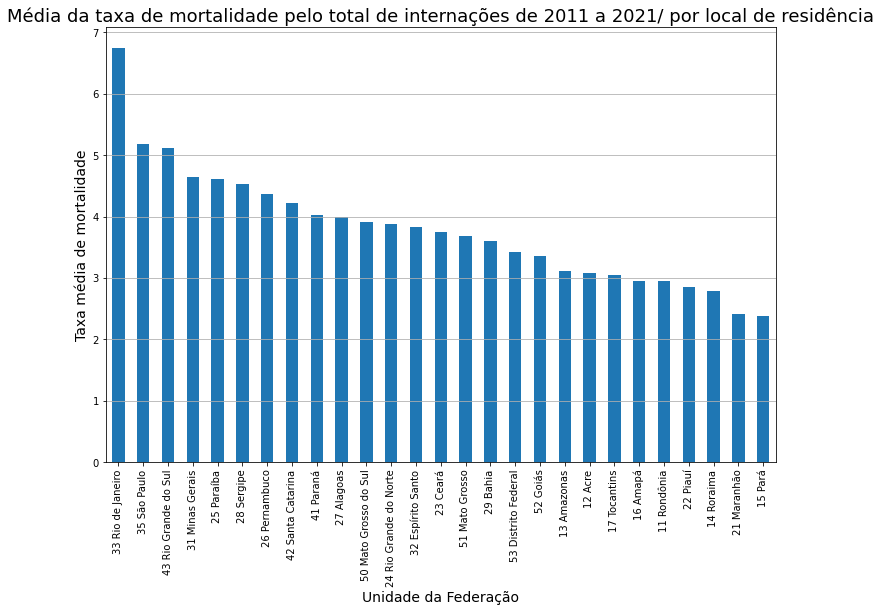

In [122]:
ax = dado_res.T.mean().sort_values(ascending= False).plot(figsize=(12,8), kind="bar")
ax.set_xlabel('Unidade da Federação', fontsize=14)
ax.set_ylabel("Taxa média de mortalidade", fontsize=14)
plt.title("Média da taxa de mortalidade pelo total de internações de 2011 a 2021/ por local de residência", fontsize=18)
plt.grid(axis = 'y')
plt.show()

**Já consegui perceber que a ordem das Unidades da Federação não mudou praticamente nada e as taxas também parecem ser muito similares.**

In [123]:
dado_res.T.mean().sort_values()

Unidade da Federação
15 Pará                   2.372764
21 Maranhão               2.411951
14 Roraima                2.787642
22 Piauí                  2.851382
11 Rondônia               2.951626
16 Amapá                  2.956260
17 Tocantins              3.041789
12 Acre                   3.075447
13 Amazonas               3.112927
52 Goiás                  3.349512
53 Distrito Federal       3.418862
29 Bahia                  3.602846
51 Mato Grosso            3.677724
23 Ceará                  3.745122
32 Espírito Santo         3.826667
24 Rio Grande do Norte    3.875285
50 Mato Grosso do Sul     3.917317
27 Alagoas                3.994797
41 Paraná                 4.029675
42 Santa Catarina         4.225366
26 Pernambuco             4.363821
28 Sergipe                4.524878
25 Paraíba                4.613415
31 Minas Gerais           4.646423
43 Rio Grande do Sul      5.117805
35 São Paulo              5.178049
33 Rio de Janeiro         6.747317
dtype: float64

**Vamos comparar os dois, a taxa de mortalidade por total de internações por local de residência e por local de ocorrência:**

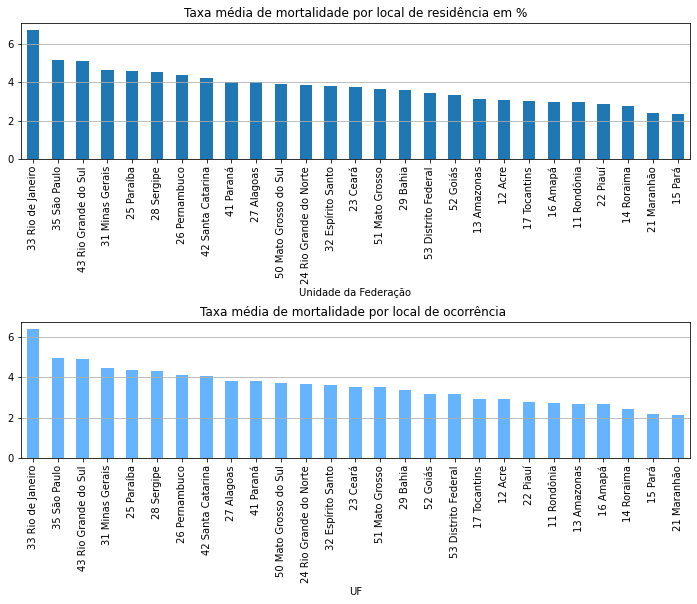

In [124]:
plt.figure(figsize = (12, 16))
grid = plt.GridSpec(2, 1, hspace = 1.2)
plt.grid(axis="y")
g1= plt.subplot(grid[0,0])
g2= plt.subplot(grid[1,0])
dado_res.T.mean().sort_values(ascending= False).plot(figsize=(12,8), kind="bar", ax=g1)
g1.set_title("Taxa média de mortalidade por local de residência em %")
g1.grid(axis='y')
dados_t.mean().sort_values(ascending= False).plot(figsize=(12,8), kind="bar", ax=g2,  color='#66b3ff')
g2.set_title("Taxa média de mortalidade por local de ocorrência ")
g2.grid(axis='y')
plt.show()

**Olhando para os gráficos, as diferenças são quase imperceptíveis, com alguns Estados tendo mudado poucas posições para direita ou para esquerda.
Dessa forma, uma possível migração de pacientes não parece ser a explicação para as taxas altas nos Estados mais desenvolvidos.**

##**5 Conclusão**

Nesta breve análise, consegui descobrir algumas coisas sobre a mortalidade pelo total de internações no SUS entre os anos de 2011 e 2021:



* As taxas de mortalidade variam entre os Estados, sendo que as médias mais altas são dos Estados da Região Sudeste e Sul, com Rio de Janeiro sendo o estado com a média mais alta, seguido por São Paulo. Pará e Maranhão têm as médias mais baixas.

* Não se verificou relação entre as médias altas nos Estados mais desenvolvidos com a migração de pacientes de locais menos desenvolvidos, utilizando como base os dados de mortalidade por total de internações por local de residência do paciente. Entretanto, seriam necessárias outras análises para descartar totalmente esta hipotése, pois em alguns casos estes pacientes podem vir a se instalar nesses estados, passando então a residir ali. Um outro ponto a ser explorado seria o do acesso ao SUS nos diferentes locais. Será que nos estados mais pobres e com menor acesso à saúde mais pessoas morrem antes mesmo de ter acesso aos serviços?

* Também não foram analisadas as causas das mortes, o que poderia ajudar a elucidar o porquê das taxas tão altas no Rio de Janeiro. Poderá estar ligado a um número maior de mortes violentas(por arma de fogo, por exemplo)?


* As taxas de mortalidade variam no tempo, com uma tendência de leve alta para todas as UF entre 2011 e 2020. A partir do início de 2020 tenho um crescimento das taxas muito fora do padrão, o que pode ser explicado pela pandemia de COVID 19.

* Os histogramas mostram que essas taxas se concentram entre 2% e 5%.

* Quando análisei as taxas médias, mínimas e máximas notei que há uma menor diferença entre os Estados com relação a taxa máxima. Isso também me informa que a pandemia de COVID fez subir as taxas de mortalidade dos Estados a um patamar bem parecido.

* O gráfico que compara o comportamento das taxas de mortalidade no período da pandemia mostra a tendência de picos, tendo sido o primeiro por volta de junho de 2020 e o segundo, e maior, se iniciou por volta de novembro e ainda parece não ter atingido o pico. No entanto, esta segunda curva de alta parece estar mais achatada do que a primeira, que formou um pico bem definido, especialmente nos casos de Pará e Maranhão, dentre os Estados analisados no gráfico.


**Em conclusão, conseguimos descobrir como se comportou a taxa de mortalidade pelo total de internações no SUS na última década, mas para entender as razões por trás da distribuição espacial e temporal dessas taxas, outros dados e outras análise são imprescindíveis.**